In [1]:
import numpy as np
import sys
sys.path.append("..")
import ruler
from matplotlib import pyplot as plt

Some tests based on regular 2d shapes are as follows.

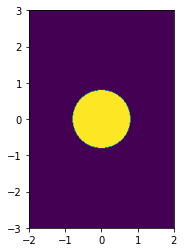

In [2]:
nx,ny = 300,200 # numbers of rows and columns, respectively
design_width,design_height = 6,4
x_coord,y_coord = np.linspace(-design_width/2, design_width/2, nx),np.linspace(-design_height/2, design_height/2, ny)
xv, yv = np.meshgrid(x_coord, y_coord, sparse=True, indexing='ij')

diameter = 1.6
xc,yc = 0,0
disc = np.where((xv-xc)**2+(yv-yc)**2<=diameter**2/4,1,0)

plt.figure()
plt.imshow(disc,extent=[y_coord[0],y_coord[-1],x_coord[0],x_coord[-1]])
plt.show()

Both the array of the 2d geometric pattern and the physical size are needed to compute the minimum length scale. The physical size should be in an array or list containing two elements, with the first and second elements corresponding to the row and the column of the 2d array, respectively.

In [3]:
phys_size = [design_width,design_height] # physical size of the 2d design
# the two elements correspond to the row and the column of the 2d array, respectively

min_ls = ruler.minimum_length(disc,phys_size) # search the minimum length scale
print("The declared minimum length scale of the disc is ",diameter)
print("The estimated minimum length scale of the disc is ",min_ls)

The declared minimum length scale of the disc is  1.6
The estimated minimum length scale of the disc is  1.578125


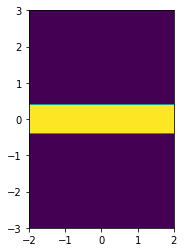

In [4]:
width = 0.8
horizontal_stripe = np.tile(np.where(np.abs(xv)<=width/2,1,0),ny)

plt.figure()
plt.imshow(horizontal_stripe,extent=[y_coord[0],y_coord[-1],x_coord[0],x_coord[-1]])
plt.show()

In [5]:
min_ls = ruler.minimum_length(horizontal_stripe,phys_size) # search the minimum length scale
print("The declared minimum length scale of the horizontal stripe is ",width)
print("The estimated minimum length scale of the horizontal stripe is ",min_ls)

The declared minimum length scale of the horizontal stripe is  0.8
The estimated minimum length scale of the horizontal stripe is  0.8125


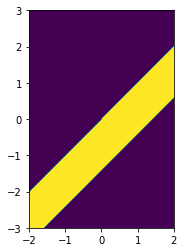

In [6]:
nx,ny = 300,200
design_width,design_height = 6,4
x_coord,y_coord = np.linspace(-design_width/2, design_width/2, nx),np.linspace(-design_height/2, design_height/2, ny)
xv, yv = np.meshgrid(x_coord, y_coord, sparse=True, indexing='ij')

width,intercept,angle = 1,1/np.sqrt(2),0.25*np.pi
oblique_stripe = np.where(yv*np.cos(angle)+xv*np.sin(angle)>=intercept*np.sin(angle)-width/2,1,0)*np.where(
    yv*np.cos(angle)+xv*np.sin(angle)<=intercept*np.sin(angle)+width/2,1,0)

plt.figure()
plt.imshow(oblique_stripe,extent=[y_coord[0],y_coord[-1],x_coord[0],x_coord[-1]])
plt.show()

To discard border regions that may affect the estimated minimum length scale, a marginal size `margin_size` needs to be passed to the function `minimum_length`. The first and second elements of `margin_size` defines the discarded sizes along the row dimension, and the third and fourth elements of `margin_size` defines the discarded sizes along the column dimension.

In [7]:
phys_size = [design_width,design_height] # physical size of the 2d design
margin_size = [0,2,0,1] # widths of the marginal region to be ignored

min_ls = ruler.minimum_length(oblique_stripe,phys_size,margin_size) # search the minimum length scale
print("The declared minimum length scale of the oblique stripe is ",width)
print("The estimated minimum length scale of the oblique stripe is ",min_ls)

The declared minimum length scale of the oblique stripe is  1
The estimated minimum length scale of the oblique stripe is  1.0


Some tests based on 2d design patterns provided by Martin F. Schubert are as follows.

In [8]:
Lx,Ly = 512,512
phys_size = [Lx,Ly]

design_minls_arr = np.linspace(5,40,36,dtype=int)
ruler_minls_arr = []

for design_minls in design_minls_arr:
    file_name = "design_pattern_examples/design_"+str(design_minls)+".csv"
    design_pattern = np.loadtxt(file_name, delimiter=",")
    ruler_minls = ruler.minimum_length(design_pattern,phys_size)# search the minimum length scale
    ruler_minls_arr.append(ruler_minls)
    print("Minimum length scales: ",design_minls,"(declared), ",ruler_minls,"(estimated).")

Minimum length scales:  5 (declared),  6.0 (estimated).
Minimum length scales:  6 (declared),  6.0 (estimated).
Minimum length scales:  7 (declared),  8.0 (estimated).
Minimum length scales:  8 (declared),  8.0 (estimated).
Minimum length scales:  9 (declared),  11.0 (estimated).
Minimum length scales:  10 (declared),  9.0 (estimated).
Minimum length scales:  11 (declared),  12.0 (estimated).
Minimum length scales:  12 (declared),  12.0 (estimated).
Minimum length scales:  13 (declared),  14.0 (estimated).
Minimum length scales:  14 (declared),  13.0 (estimated).
Minimum length scales:  15 (declared),  16.0 (estimated).
Minimum length scales:  16 (declared),  16.0 (estimated).
Minimum length scales:  17 (declared),  18.0 (estimated).
Minimum length scales:  18 (declared),  17.0 (estimated).
Minimum length scales:  19 (declared),  20.0 (estimated).
Minimum length scales:  20 (declared),  19.0 (estimated).
Minimum length scales:  21 (declared),  22.0 (estimated).
Minimum length scales:  

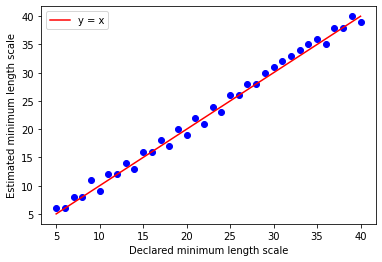

In [9]:
plt.plot(design_minls_arr,ruler_minls_arr,"bo")
plt.plot(design_minls_arr,design_minls_arr,"r-",label="y = x")

plt.xlabel("Declared minimum length scale")
plt.ylabel("Estimated minimum length scale")
plt.legend();

Some tests based on regular 3d shapes are as follows.

In [10]:
# examples in 3d
nx, ny, nz = 80, 80, 80
sx, sy, sz = 2, 2, 2
x_coord, y_coord, z_coord = np.linspace(-sx/2, sx/2, nx), np.linspace(-sy/2, sy/2, ny), np.linspace(-sz/2, sz/2, nz)
xv,yv,zv = np.meshgrid(x_coord, y_coord, z_coord, sparse=True, indexing='ij')

# ball with the diameter 0.8
diameter = 0.8
xc, yc, zc = 0,0,0
ball = np.where((xv-xc)**2+(yv-yc)**2+(zv-zc)**2<=diameter**2/4,1,0)

phys_size = [sx,sy,sz] # physical size of the 3d design
min_ls = ruler.minimum_length(ball,phys_size) # search the minimum length scale

print("The declared minimum length scale of the ball is ",diameter)
print("The estimated minimum length scale of the ball is ",min_ls)

The declared minimum length scale of the ball is  0.8
The estimated minimum length scale of the ball is  0.765625


In [11]:
# slab with the thickness 0.8
width = 0.8
slab = np.tile(np.where(np.abs(xv)<=width/2,1,0),(ny,nz))

min_ls = ruler.minimum_length(slab,phys_size) # search the minimum length scale

print("The declared minimum length scale of the slab is ",width)
print("The estimated minimum length scale of the slab is ",min_ls)

The declared minimum length scale of the slab is  0.8
The estimated minimum length scale of the slab is  0.8125


In [12]:
# stick with the diameter 0.8
diameter = 0.8
stick = np.tile(np.where(xv**2+yv**2<=diameter**2/4,1,0),nz)

min_ls = ruler.minimum_length(stick,phys_size) # search the minimum length scale

print("The declared minimum length scale of the stick is ",diameter)
print("The estimated minimum length scale of the stick is ",min_ls)

The declared minimum length scale of the stick is  0.8
The estimated minimum length scale of the stick is  0.765625


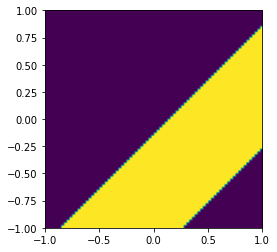

In [13]:
# oblique slab with the thickness 0.8
width,intercept,angle = 0.8,1/np.sqrt(2),0.25*np.pi
oblique_stripe = np.where(yv*np.cos(angle)+xv*np.sin(angle)>=intercept*np.sin(angle)-width/2,1,0)*np.where(
    yv*np.cos(angle)+xv*np.sin(angle)<=intercept*np.sin(angle)+width/2,1,0)
oblique_slab = np.tile(oblique_stripe,nz)

plt.figure()
plt.imshow(oblique_stripe[:,:,0],extent=[x_coord[0],x_coord[-1],y_coord[0],y_coord[-1]]) # cross section
plt.show()

In [14]:
phys_size = [sx,sy,sz] # physical size of the 2d design
margin_size = [0,0.4,0,0.4,0,0] # widths of marginal region to be ignored, the three pairs of elements correspond the three dimensions

min_ls = ruler.minimum_length(oblique_slab,phys_size,margin_size) # search the minimum length scale

print("The declared minimum length scale of the oblique slab is ",width)
print("The estimated minimum length scale of the oblique slab is ",min_ls)

The declared minimum length scale of the oblique slab is  0.8
The estimated minimum length scale of the oblique slab is  0.828125
